git clone https://github.com/ThaWeatherMan/Scrapers.git

# Import Libraries

In [424]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold, KFold


# to help doing Cross-validation
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

#Import Metrics evaluator
from sklearn.metrics import mean_squared_error, r2_score ,classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import precision_recall_curve

# Import Models

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

#To save the model
import joblib


# Ignore Warninga
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", UserWarning)

# Load Data

In [425]:
data = pd.read_csv('games.csv.txt')
data.columns, data.shape

(Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers', 'playingtime',
        'minplaytime', 'maxplaytime', 'minage', 'users_rated', 'average_rating',
        'bayes_average_rating', 'total_owners', 'total_traders', 'total_wanters', 'total_wishers',
        'total_comments', 'total_weights', 'average_weight'],
       dtype='object'),
 (81312, 20))

In [426]:
data.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.338,8.222,26647,372,1219,5865,5347,2562,3.478
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.288,8.142,16519,132,1586,6277,2526,1423,3.894
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.290,8.069,12230,99,1476,5600,1700,777,3.776
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.204,8.058,14343,362,1084,5075,3378,1642,4.159
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.143,8.045,44362,795,861,5414,9173,5213,3.294


In [427]:
data.isnull().sum()

id                       0
type                     0
name                    41
yearpublished            3
minplayers               3
maxplayers               3
playingtime              3
minplaytime              3
maxplaytime              3
minage                   3
users_rated              0
average_rating           0
bayes_average_rating     0
total_owners             0
total_traders            0
total_wanters            0
total_wishers            0
total_comments           0
total_weights            0
average_weight           0
dtype: int64

In [428]:
pd.set_option('display.width', 100)
pd.set_option('precision', 3)
description = data.describe()
print(description)

               id  yearpublished  minplayers  maxplayers  playingtime  minplaytime  maxplaytime  \
count   81312.000      81309.000   81309.000   81309.000    81309.000    81309.000    81309.000   
mean    72278.150       1806.631       1.992       5.638       51.635       49.277       51.635   
std     58818.238        588.518       0.931      56.077      345.700      334.484      345.700   
min         1.000      -3500.000       0.000       0.000        0.000        0.000        0.000   
25%     21339.750       1984.000       2.000       2.000        8.000       10.000        8.000   
50%     43258.000       2003.000       2.000       4.000       30.000       30.000       30.000   
75%    128836.500       2010.000       2.000       6.000       60.000       60.000       60.000   
max    184451.000       2018.000      99.000   11299.000    60120.000    60120.000    60120.000   

          minage  users_rated  average_rating  bayes_average_rating  total_owners  total_traders  \
count  8

In [429]:
types = data.dtypes
print(types, data.shape)

id                        int64
type                     object
name                     object
yearpublished           float64
minplayers              float64
maxplayers              float64
playingtime             float64
minplaytime             float64
maxplaytime             float64
minage                  float64
users_rated               int64
average_rating          float64
bayes_average_rating    float64
total_owners              int64
total_traders             int64
total_wanters             int64
total_wishers             int64
total_comments            int64
total_weights             int64
average_weight          float64
dtype: object (81312, 20)


In [430]:
data.dtypes.value_counts()

float64    10
int64       8
object      2
dtype: int64

In [431]:
data['type'].value_counts()

boardgame             70820
boardgameexpansion    10492
Name: type, dtype: int64

In [432]:
data = data.drop_duplicates()
data.shape

(79463, 20)

In [433]:
# drop unimportant columns
data.drop(['id', 'name', 'type', 'bayes_average_rating'], axis = 1, inplace = True)

In [434]:
# remove any row has no 'users_rating' 
data = data[data['users_rated'] > 0]

In [435]:
data[data['users_rated'] == 0]

,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight


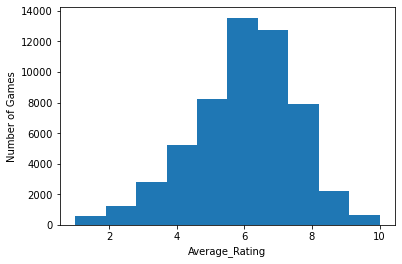

In [436]:
plt.hist(data['average_rating'])
plt.xlabel('Average_Rating')
plt.ylabel('Number of Games')
plt.show();

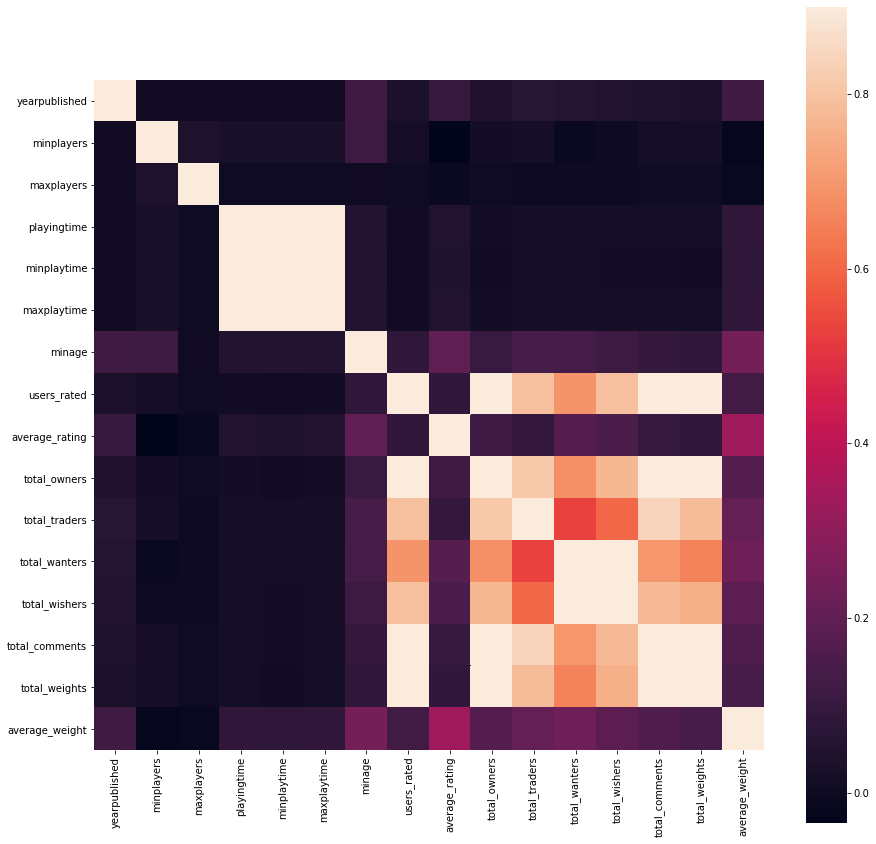

In [437]:
# Correlation Matrix

corrmat = data.corr()
fig = plt.figure(figsize = (15, 15))
sns.heatmap(corrmat, vmax = .9, square = True);

# Search for Null data and locate them

In [438]:
data.isna().sum()

yearpublished     2
minplayers        2
maxplayers        2
playingtime       2
minplaytime       2
maxplaytime       2
minage            2
users_rated       0
average_rating    0
total_owners      0
total_traders     0
total_wanters     0
total_wishers     0
total_comments    0
total_weights     0
average_weight    0
dtype: int64

In [440]:
is_NaN = data.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = data[row_has_NaN]
rows_with_NaN 

,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
46057,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,6.500,29,2,0,0,9,3,2.0
46537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,6.972,35,0,1,4,8,4,3.5


In [442]:
data.shape

(55102, 16)

# Deal with Null Data

## 1) Remove Rows With Missing Values ( and some 0 value from Year column)

In [469]:
# Remove rows with year set to '0'
data1 = data[data['yearpublished'] > 0]
data1[data1['yearpublished'] == 0 ]

,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight


In [470]:
data1.shape

(51607, 16)

Build a simple Linear Model Using the Data1 which is the data with all null rows removed

In [471]:
from sklearn.linear_model import LinearRegression

X = data1.drop('average_rating', axis = 1)
y = data1.average_rating

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

type_of_target(y), X.shape, y.shape

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

predictions = lin_reg.predict(X_test)

mean_squared_error(predictions, y_test)

2.044471015426484

In [472]:
X_test.iloc[2]

# Predicted Value
rating_lr = lin_reg.predict(X_test.iloc[5].values.reshape(1, -1))
print(rating_lr)


# Actual Value
print(y_test.iloc[5])

[5.73807828]
5.94444


### 2) Remove Rows With Missing Values
The simplest approach for dealing with missing values is to remove entire predictor(s) and/or sample(s) that contain missing values.

In [473]:
'''# replace '0' values with 'nan'
data1 = data.replace( 0, np.NAN)
# summarize the shape of the data with missing rows removed
print(data1.shape, data.shape)'''

"# replace '0' values with 'nan'\ndata1 = data.replace( 0, np.NAN)\n# summarize the shape of the data with missing rows removed\nprint(data1.shape, data.shape)"

In [474]:
data2 = data.dropna()
data2.shape, data.shape

((55100, 16), (55102, 16))

In [475]:
is_NaN = data2.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = data2[row_has_NaN]
rows_with_NaN 

,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight


In [492]:
from sklearn.linear_model import LinearRegression

X = data2.drop('average_rating', axis = 1)
y = data2.average_rating

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

predictions = lin_reg.predict(X_test)

mean_squared_error(predictions, y_test)

2.1453237695871965

In [493]:
# Predicted Value
rating_lr = lin_reg.predict(X_test.iloc[5].values.reshape(1, -1))
print(rating_lr)


# Actual Value
print(y_test.iloc[5])

[5.54279101]
6.0


## 3) Replace Missing value with median, mean, max or min or STD DEV


In [485]:
# Check if any column has missing values greater than 40 % of the whole data
print("Data Size Before Numerical NAN Column(>40%) Removal :",data.shape)
de = []
for col in data.columns.values:
    if data[col].isnull().sum() > (40/100*len(data)):
        de.append(col)
        print(col,"removed")
        data=data.drop([col], axis=1)
print("Data Size After Numerical NAN Column(>40%) Removal :",data.shape)

if len(de) == 0:
    print('There is no column removed')
elif len(col) > 0:
    for col in de:
        print("this {} removed". format(col))

Data Size Before Numerical NAN Column(>40%) Removal : (55102, 16)
Data Size After Numerical NAN Column(>40%) Removal : (55102, 16)
There is no column removed


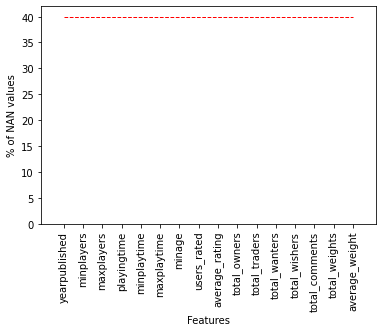

In [486]:
# Our threshold for missing data is 40 %
nan_per=data.isna().sum()/len(data)*100
plt.bar(range(len(nan_per)),nan_per)
plt.xlabel('Features')
plt.ylabel('% of NAN values')
plt.plot([0, 15], [40,40], 'r--', lw=1)
plt.xticks(list(range(len(data.columns))),list(data.columns.values),rotation='vertical');
# ';' to hide the description of the plot

In [487]:
data3 = data.copy()
for col in data3.columns.values:
    if data3[col].isnull().sum() < (40/100*len(data2)):
        data3[col]=data3[col].fillna(data3[col].mean())

In [488]:
is_NaN = data3.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = data3[row_has_NaN]
rows_with_NaN 

,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight


There is no more null data in the dataset as all of them replaced by median of the other rows

In [491]:
from sklearn.linear_model import LinearRegression

X = data2.drop('average_rating', axis = 1)
y = data2.average_rating

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

predictions = lin_reg.predict(X_test)

print(mean_squared_error(predictions, y_test))

# Predicted Value
rating_lr = lin_reg.predict(X_test.iloc[5].values.reshape(1, -1))
print(rating_lr)


# Actual Value
print(y_test.iloc[5])

2.2035697409980814
[5.90236185]
7.875


## 4) Impute Missing Values

Imputing refers to using a model to replace missing values.

There are many options we could consider when replacing a missing value, for example:
<ol>
    <li> A constant value that has meaning within the domain, such as 0, distinct from all other values.</li>
    <li> A value from another randomly selected record.</li>
    <li> A mean, median or mode value for the column.</li>
    <li> A value estimated by another predictive model.</li>
</ol>

<p> Any imputing performed on the training dataset will have to be performed on new data in the future when predictions are needed from the finalized model. This needs to be taken into consideration when choosing how to impute the missing values.</p>

In [551]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
data4 = data.copy()

X = data4.drop('average_rating', axis = 1)
y = data4.average_rating

X.shape, y.shape

((55102, 15), (55102,))

In [552]:
y.head()

0    8.338
1    8.288
2    8.290
3    8.204
4    8.143
Name: average_rating, dtype: float64

In [553]:
is_NaN = data4.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = data4[row_has_NaN]
rows_with_NaN 

,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
46057,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,6.500,29,2,0,0,9,3,2.0
46537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,6.972,35,0,1,4,8,4,3.5


In [554]:
# define the imputer
imputer = SimpleImputer(missing_values=np.NAN, strategy='mean')

# fit on the dataset
imputer.fit(X)

# transform the dataset
Xtrans = imputer.transform(X)

In [555]:
is_NaN = np.isnan(Xtrans)
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = data4[row_has_NaN]
rows_with_NaN 

,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight


In [556]:
print('Missing: {}'.format(sum(np.isnan(X.values).flatten())))
print('Missing: {}'.format(sum(np.isnan(Xtrans).flatten())))

Missing: 14
Missing: 0


In [557]:
Xtrans.shape, y.shape

((55102, 15), (55102,))

As 'X' is just a slice from the dataframe so that i should extract its values to be able to flatten it

To correctly apply statistical missing data imputation and avoid data leakage, it is required that the statistics calculated for each column are calculated on the training dataset only, then applied to the train and test sets for each fold in the dataset.

In [558]:
type_of_target(Xtrans), y.value_counts()

('continuous-multioutput',
 6.000    2853
 5.000    2622
 7.000    2311
 4.000    2003
 8.000    1519
          ... 
 7.919       1
 6.176       1
 8.158       1
 7.174       1
 7.699       1
 Name: average_rating, Length: 17563, dtype: int64)

In [559]:
from sklearn.utils.multiclass import type_of_target
type_of_target(y), y.value_counts()

('continuous',
 6.000    2853
 5.000    2622
 7.000    2311
 4.000    2003
 8.000    1519
          ... 
 7.919       1
 6.176       1
 8.158       1
 7.174       1
 7.699       1
 Name: average_rating, Length: 17563, dtype: int64)

In [560]:
from sklearn.linear_model import LinearRegression



X_train, X_test, y_train, y_test = train_test_split(Xtrans, y, test_size=0.1)

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

predictions = lin_reg.predict(X_test)

print(mean_squared_error(predictions, y_test))



2.123288746940539


In [561]:
# Predicted Value
rating_lr = lin_reg.predict(X_test[5].reshape(1, -1))
print(rating_lr)


# Actual Value
print(y_test.iloc[5])

[6.9622938]
7.17045


In [563]:
# Apply decision Tree

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

predictions = tree_reg.predict(X_test)
tree_mse = mean_squared_error(y_test, predictions)

tree_rmse = np.sqrt(tree_mse)

tree_rmse 

1.7238847918319282

# RepeatedStratifiedKFold

To correctly apply statistical missing data imputation and avoid data leakage, it is required that the statistics calculated for each column are calculated on the training dataset only, then applied to the train and test sets for each fold in the dataset.

In [564]:
bins = np.linspace(0, 506, 50)

# Save your Y values in a new ndarray,
# broken down by the bins created above.

y_binned = np.digitize(y, bins)

# Pass y_binned to the stratify argument,
# and sklearn will handle the rest

X_train, X_test, y_train, y_test = train_test_split(Xtrans, y_binned, test_size=0.3, stratify=y_binned)
from sklearn.utils.multiclass import type_of_target
type_of_target(y_binned)

'binary'

In [565]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from numpy import mean
from numpy import std


# define modeling pipeline
model = RandomForestClassifier()
imputer = SimpleImputer(strategy='mean')
pipeline = Pipeline(steps=[('i', imputer), ('m', model)])
# define model evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(pipeline, Xtrans, y_binned, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean Accuracy: 1.000 (0.000)
